Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 
Вопрос: Сколько уникальных значений принимает переменная platform?

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
user_data = pd.read_csv(r'C:\Users\PC\Desktop\Софт\Simulation\Simulation\data\3_user_data.csv')

In [4]:
logs = pd.read_csv(r'C:\Users\PC\Desktop\Софт\Simulation\Simulation\data\3_logs.csv')

In [5]:
user_data.head()

client  premium  age
0   46346    False   58
1    4391    False   55
2   27372    False   64
3   11989    False   44
4   60664    False   49

In [6]:
logs.head()

client  success  platform        time
0   40177     True     phone  1585412212
1   61468     True     phone  1585425658
2   35604    False     phone  1585459894
3    9961     True     phone  1585400189
4   10931     True  computer  1585468629

In [7]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [8]:
logs.info()
logs.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


client success platform          time
count    4500.000000    4500     4500  4.500000e+03
unique           NaN       2        3           NaN
top              NaN    True    phone           NaN
freq             NaN    3289     2753           NaN
mean    50998.758000     NaN      NaN  1.585440e+09
std     28374.472495     NaN      NaN  2.314866e+04
min        40.000000     NaN      NaN  1.585400e+09
25%     27056.500000     NaN      NaN  1.585420e+09
50%     52659.000000     NaN      NaN  1.585440e+09
75%     76001.250000     NaN      NaN  1.585461e+09
max     99993.000000     NaN      NaN  1.585480e+09

Какой клиент совершил больше всего успешных операций?
Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:
12, 123, 456

In [10]:
success_counts = logs.loc[logs.success].client.value_counts()

In [11]:
max_num = success_counts.max()

In [12]:
max_success_users = success_counts.loc[success_counts == max_num]

In [13]:
max_success_users.index.sort_values()

Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')

С какой платформы осуществляется наибольшее количество успешных операций?

In [34]:
logs.loc[logs.success].platform.value_counts().idxmax()

'phone'

Какая платформа наиболее популярна среди премиумных клиентов?

In [37]:
full_ds = logs.merge(user_data, on = 'client')

In [40]:
full_ds.head()

client  success  platform        time  premium  age
0   61468     True     phone  1585425658    False   25
1   35604    False     phone  1585459894     True   65
2   10931     True  computer  1585468629    False   28
3   41928     True     phone  1585446772    False   46
4   48925     True     phone  1585467880    False   33

In [43]:
full_ds.loc[full_ds.premium].platform.value_counts().idxmax()

'phone'

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (обычный или премиум), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате? Используйте датасет, который вы получили на предыдущем шаге.

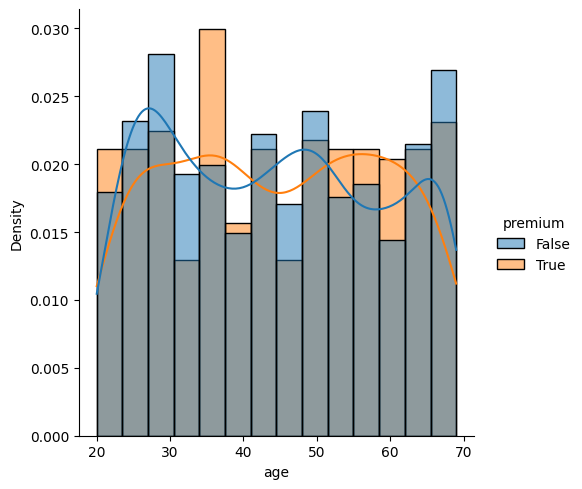

In [46]:
sns.displot(data = full_ds, x='age', hue='premium', kde= True, kind='hist', stat='density', common_norm=False, bins=14)

Постройте график распределения числа успешных операций: 
•	x – число успешных операций
•	y – число клиентов, совершивших столько успешных операций

In [47]:
success_counts = logs.loc[logs.success].client.value_counts()

In [ ]:
success_counts.head()

In [49]:
success_counts = success_counts.rename('success')

<Axes: xlabel='success', ylabel='count'>

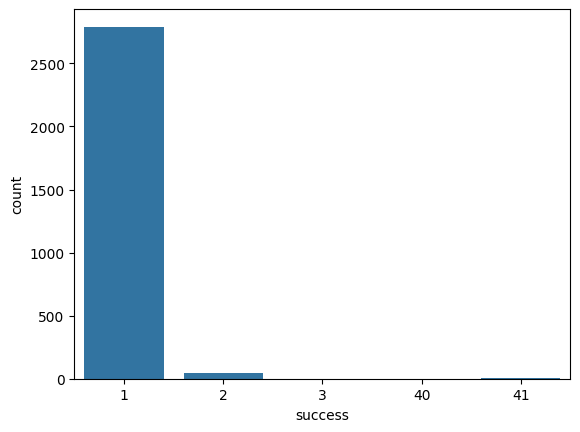

In [51]:
sns.countplot(x=success_counts)

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

In [83]:
success_counts_comp = full_ds.loc[(full_ds.success) & (full_ds.platform == 'computer')]

<Axes: xlabel='age', ylabel='count'>

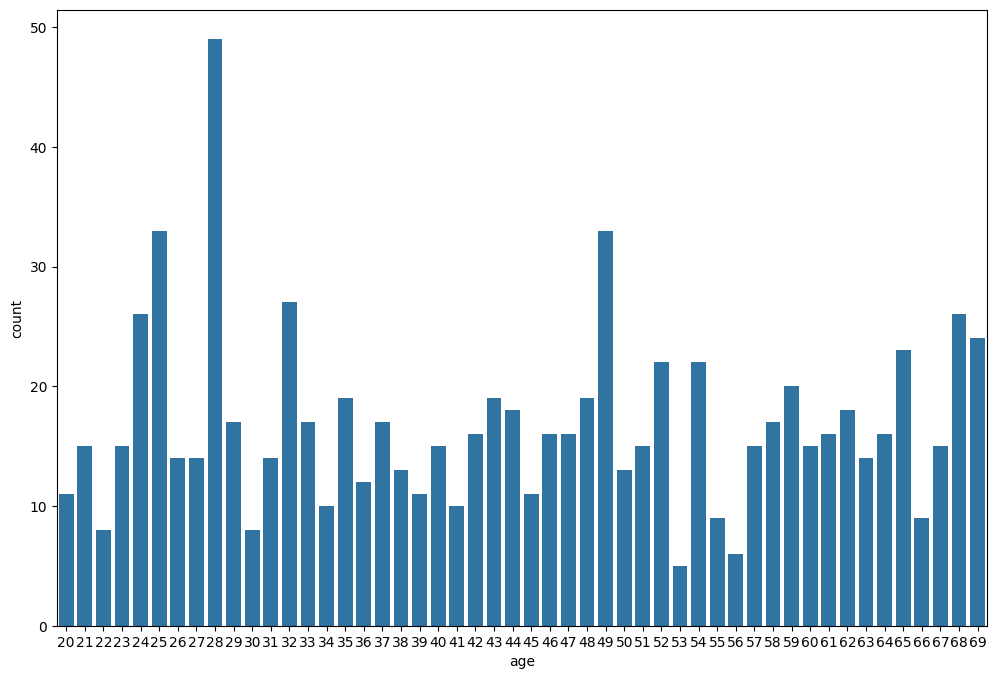

In [87]:
plt.figure(figsize=(12, 8))
sns.countplot(data = success_counts_comp, x = 'age')